# Classification Task - Alzheimer's Disease Prediction

Name: Kashif Maskey

ID: 2513342

Course: Concepts and Technologies of AI (5CS037)

Due Date: 10 February 2026

## 1. Exploratory Data Analysis and Data Understanding 

### 1. Choosing a Dataset

Selected Dataset: Alzheimer's Disease Dataset (alzheimers_disease_data.csv)

- When and by whom the dataset was created: This is a synthetic dataset created by Rabie El Kharoua and shared on Kaggle in 2023-2024 for educational purposes in machine learning and Alzheimer's research.
- How and from where the dataset was accessed: Accessed from Kaggle and loaded using pandas.
- Justification of alignment with the selected UNSDG: Aligns with UNSDG 3 (Good Health and Well-being), as it supports early prediction of Alzheimer's, a major non-communicable disease, promoting prevention and mental health.
- List and brief description of all attributes:
  - PatientID: Unique ID (dropped).
  - Age: Patient age (60-90).
  - Gender: 0=Male, 1=Female.
  - Ethnicity: 0=White, 1=African American, 2=Asian, 3=Other.
  - EducationLevel: 0=None, 1=High School, 2=Bachelor's, 3=Higher.
  - BMI: Body Mass Index.
  - Smoking: 0=No, 1=Yes.
  - AlcoholConsumption: Weekly units.
  - PhysicalActivity: Weekly hours.
  - DietQuality: Score (0-10).
  - SleepQuality: Score (4-10).
  - FamilyHistoryAlzheimers: 0=No, 1=Yes.
  - CardiovascularDisease: 0=No, 1=Yes.
  - Diabetes: 0=No, 1=Yes.
  - Depression: 0=No, 1=Yes.
  - HeadInjury: 0=No, 1=Yes.
  - Hypertension: 0=No, 1=Yes.
  - SystolicBP: Systolic blood pressure.
  - DiastolicBP: Diastolic blood pressure.
  - CholesterolTotal: Total cholesterol.
  - CholesterolLDL: LDL cholesterol.
  - CholesterolHDL: HDL cholesterol.
  - CholesterolTriglycerides: Triglycerides.
  - MMSE: Cognitive score (0-30).
  - FunctionalAssessment: Daily functioning score (0-10).
  - MemoryComplaints: 0=No, 1=Yes.
  - BehavioralProblems: 0=No, 1=Yes.
  - ADL: Activities of Daily Living score (0-10).
  - Confusion: 0=No, 1=Yes.
  - Disorientation: 0=No, 1=Yes.
  - PersonalityChanges: 0=No, 1=Yes.
  - DifficultyCompletingTasks: 0=No, 1=Yes.
  - Forgetfulness: 0=No, 1=Yes.
  - Diagnosis: Target (0=No Alzheimer's, 1=Alzheimer's).
  - DoctorInCharge: Confidential (dropped).

Identify at least 2–3 meaningful questions the dataset can answer:
1. Which clinical and lifestyle factors are most predictive of Alzheimer's diagnosis?
2. How do cognitive and functional assessments correlate with disease presence?
3. Can machine learning models achieve high accuracy in classifying Alzheimer's risk using these features?

Assess dataset quality: No missing values, moderate class imbalance (65% no disease, 35% disease), no duplicates, features are relevant but synthetic, potential noise in generated values.

### 2. Exploratory Data Analysis (EDA)

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

df = pd.read_csv('alzheimers_disease_data.csv')
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

In [21]:
df.describe()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
count,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,...,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000
mean,5825.000000,74.908795,0.506282,0.697534,1.286645,27.655697,0.288506,10.039442,4.920202,4.993138,...,5.080055,0.208004,0.156817,4.982958,0.205212,0.158213,0.150768,0.158678,0.301536,0.353653
std,620.507185,8.990221,0.500077,0.996128,0.904527,7.217438,0.453173,5.757910,2.857191,2.909055,...,2.892743,0.405974,0.363713,2.949775,0.403950,0.365026,0.357906,0.365461,0.459032,0.478214
min,4751.000000,60.000000,0.000000,0.000000,0.000000,15.008851,0.000000,0.002003,0.003616,0.009385,...,0.000460,0.000000,0.000000,0.001288,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5288.000000,67.000000,0.000000,0.000000,1.000000,21.611408,0.000000,5.139810,2.570626,2.458455,...,2.566281,0.000000,0.000000,2.342836,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5825.000000,75.000000,1.000000,0.000000,1.000000,27.823924,0.000000,9.934412,4.766424,5.076087,...,5.094439,0.000000,0.000000,5.038973,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6362.000000,83.000000,1.000000,1.000000,2.000000,33.869778,1.000000,15.157931,7.427899,7.558625,...,7.546981,0.000000,0.000000,7.581490,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,6899.000000,90.000000,1.000000,3.000000,3.000000,39.992767,1.000000,19.989293,9.987429,9.998346,...,9.996467,1.000000,1.000000,9.999747,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
df.isnull().sum()
# Insight: No missing values, good quality data.

PatientID                    0
Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfu

In [23]:
df.duplicated().sum()
# Insight: No duplicates.

np.int64(0)

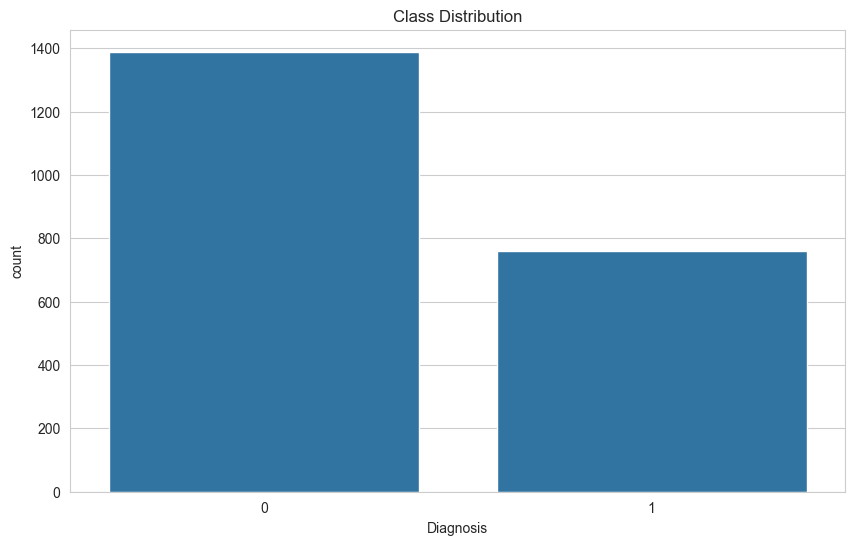

In [24]:
sns.countplot(x='Diagnosis', data=df)
plt.title('Class Distribution')
plt.show()
# Insight: Imbalance - more non-Alzheimer's cases.

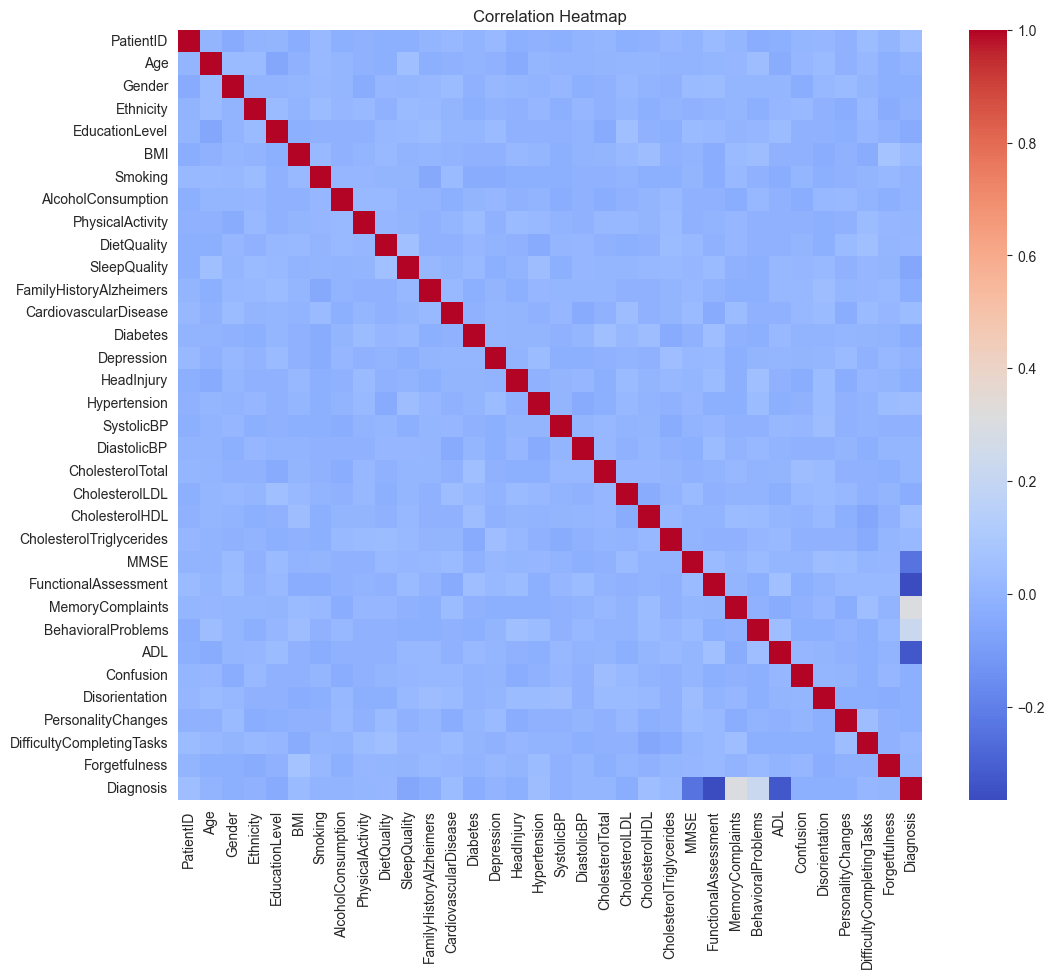

In [25]:
numeric_df = df.select_dtypes(include=np.number)
plt.figure(figsize=(12,10))
sns.heatmap(numeric_df.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
# Insight: Strong correlations between MMSE, FunctionalAssessment and Diagnosis.

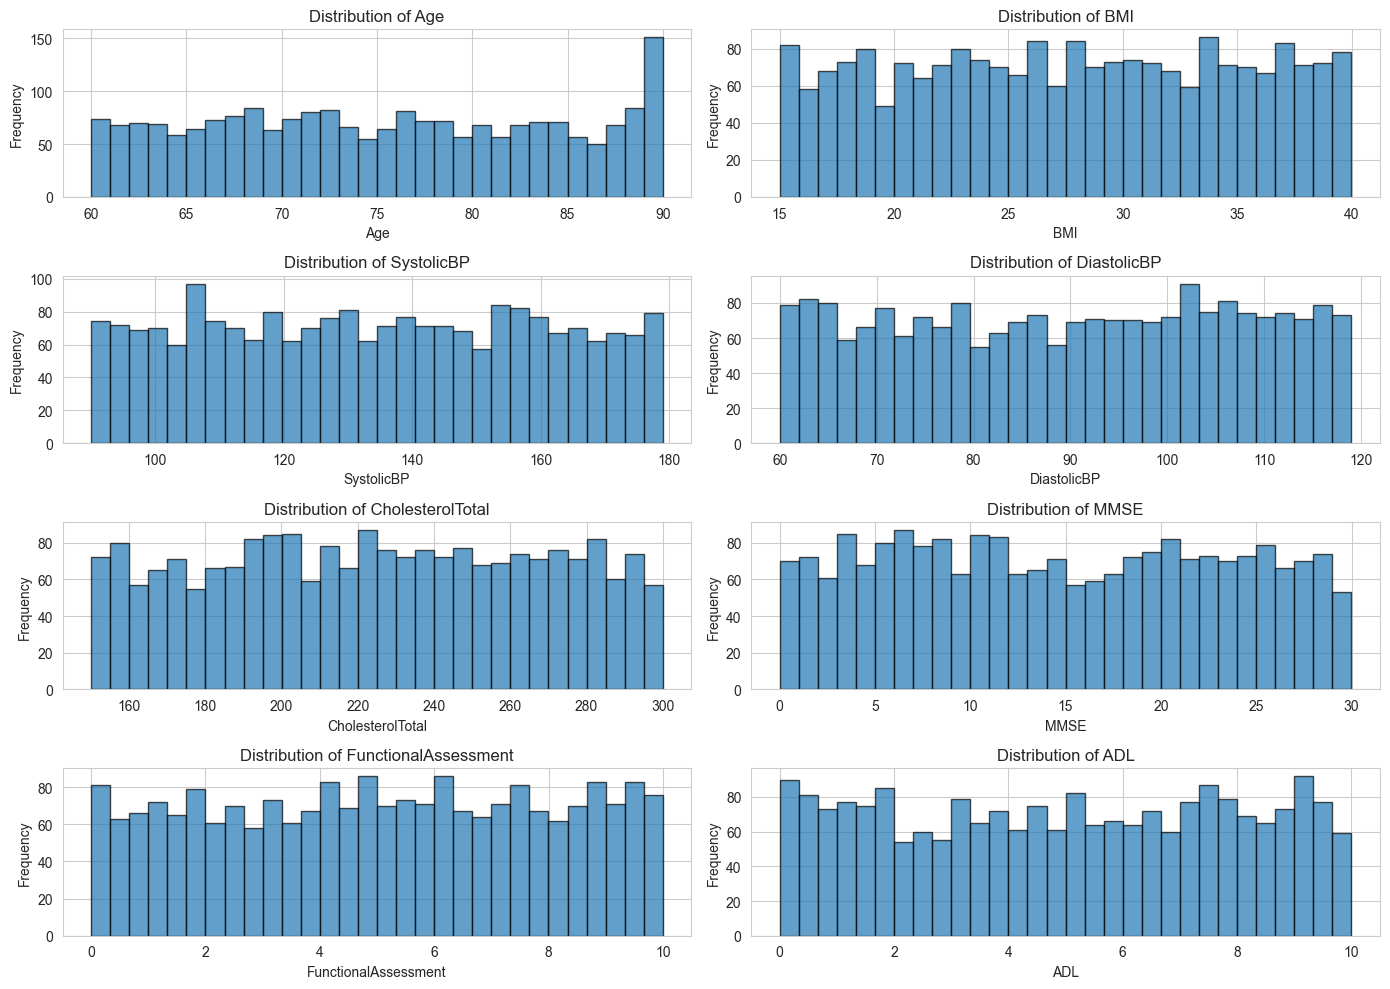

In [41]:
# Histograms for key numerical features
num_cols = ['Age',
    'BMI',
    'SystolicBP',
    'DiastolicBP',
    'CholesterolTotal',
    'MMSE',
    'FunctionalAssessment',
    'ADL']

plt.figure(figsize=(14, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(4, 2, i)
    plt.hist(df[col], bins=30, edgecolor='black', alpha=0.7)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()
# Insight: Age is uniformly distributed (60-90), MMSE shows bimodal distribution indicating different cognitive states.

The above histograms show the distribution of key numerical features that are important for Alzheimer's prediction.

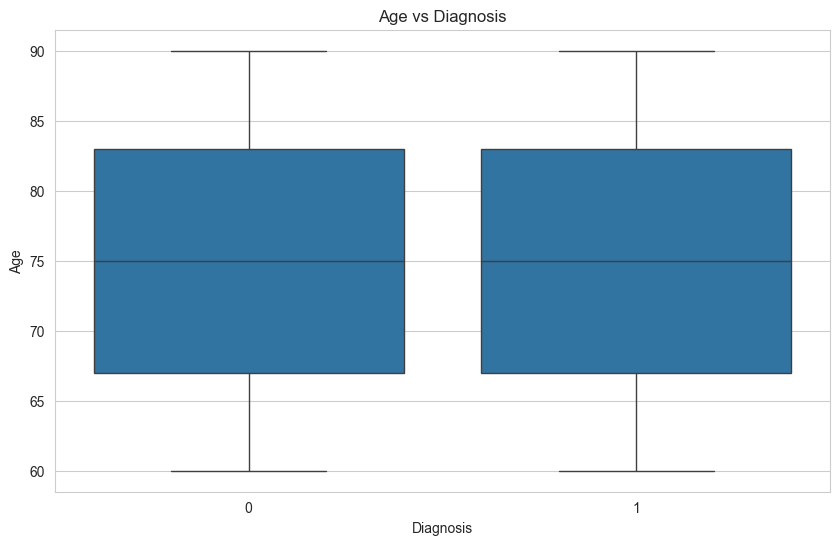

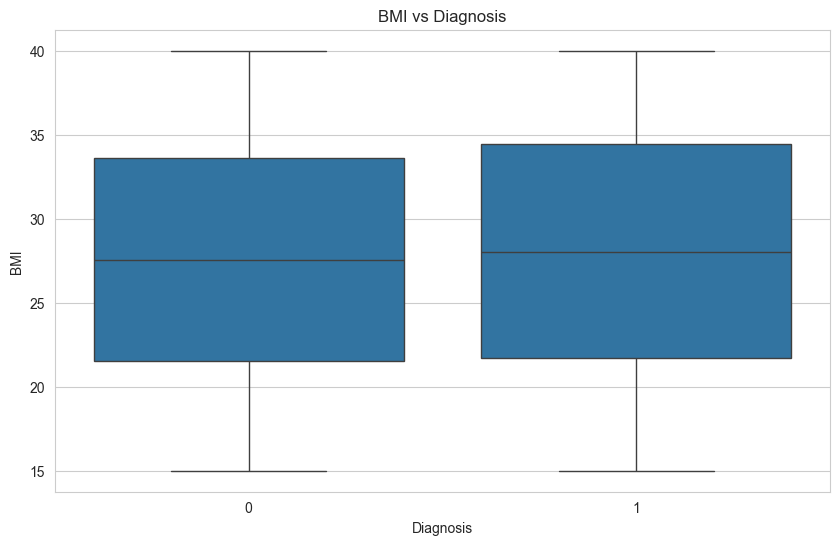

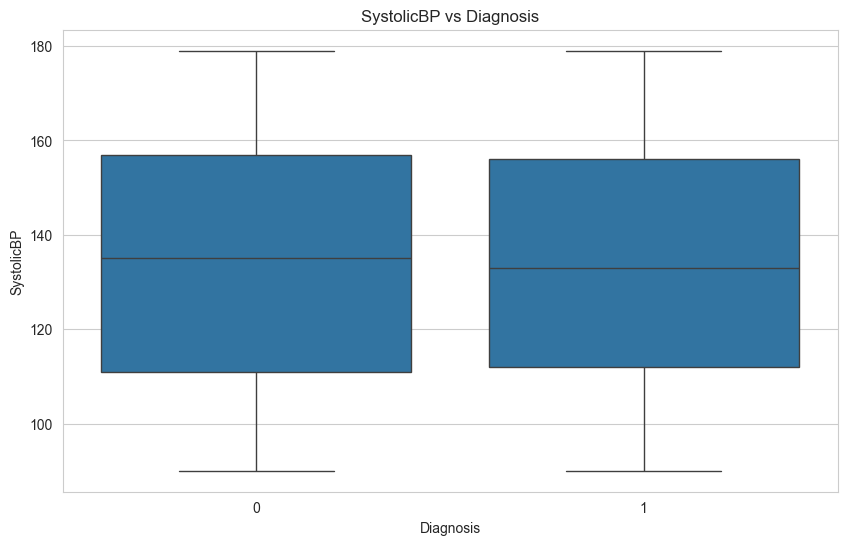

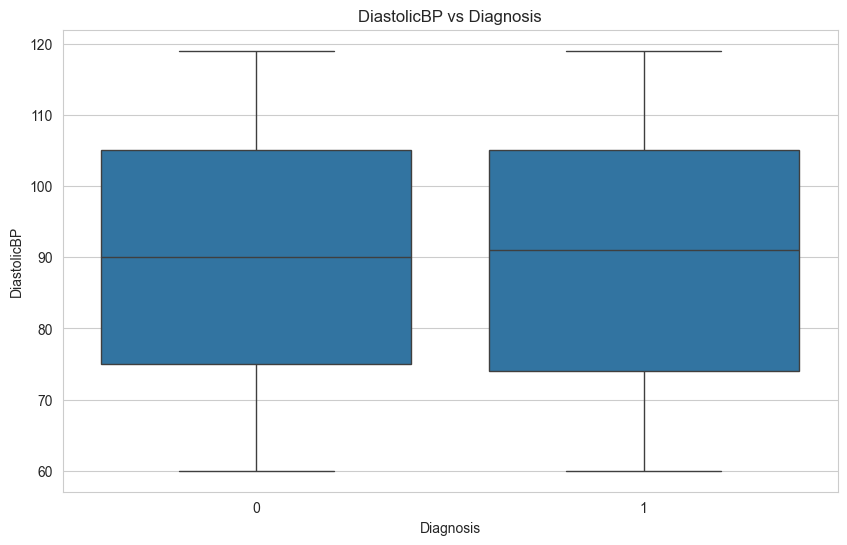

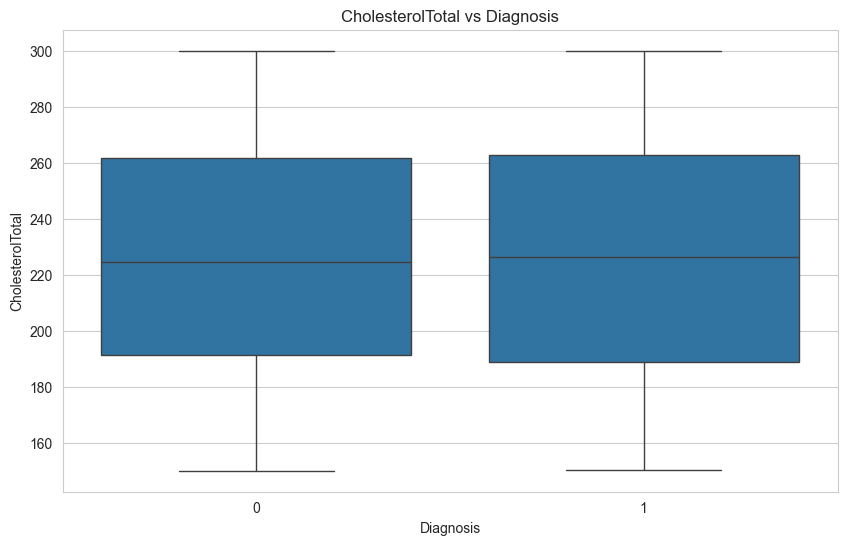

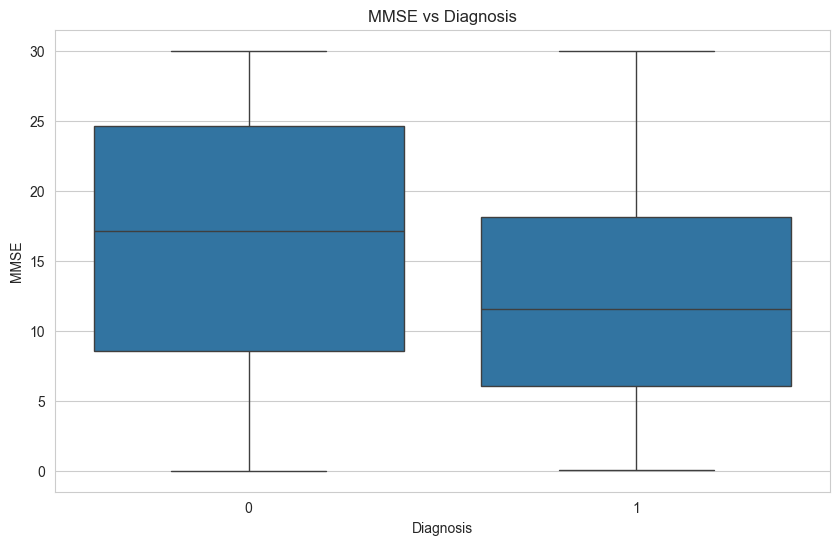

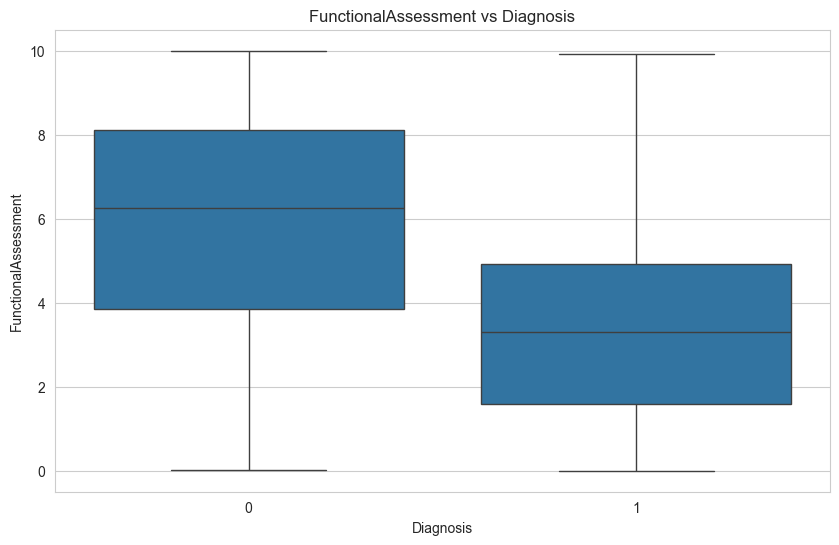

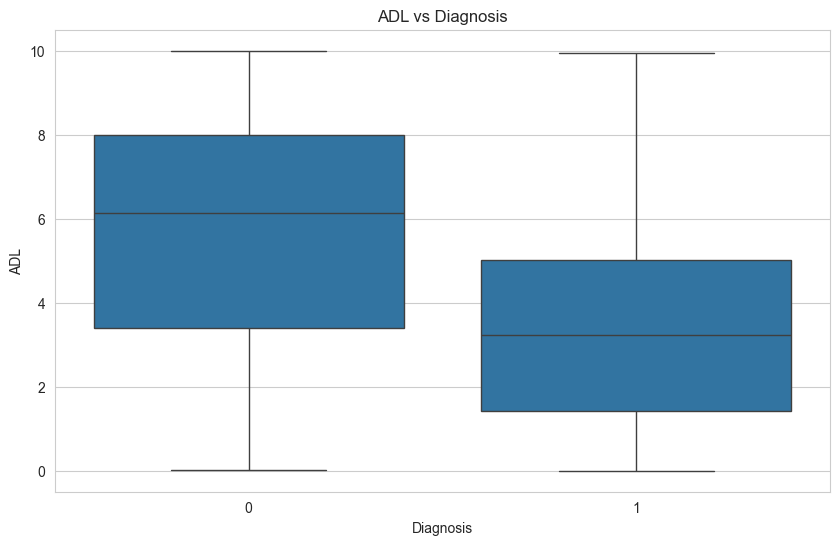

In [42]:
# Boxplots comparing features by Diagnosis
num_cols_box = ['Age',
    'BMI',
    'SystolicBP',
    'DiastolicBP',
    'CholesterolTotal',
    'MMSE',
    'FunctionalAssessment',
    'ADL']

for col in num_cols_box:
    sns.boxplot(x='Diagnosis', y=col, data=df)
    plt.title(f'{col} vs Diagnosis')
    plt.show()
# Insight: MMSE and FunctionalAssessment show clear separation between classes, while Age and BMI overlap more.

## 2. Build a Neural Network Model 

Network architecture: Input → 64 (ReLU) → 32 (ReLU) → Output (Sigmoid).

Hyperparameters:
- Hidden layers: 2 layers → 64 neurons, 32 neurons
- Activation function: ReLU (hidden layers), Sigmoid (output layer)
- Loss function: Binary cross-entropy
- Optimization algorithm: Adam
- Learning rate: 0.001
- Regularization: L2 (alpha=0.0001)
- Batch size: 64
- Max iterations: 500

Training Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1111
           1       1.00      1.00      1.00       608

    accuracy                           1.00      1719
   macro avg       1.00      1.00      1.00      1719
weighted avg       1.00      1.00      1.00      1719


Test Performance:
              precision    recall  f1-score   support

           0       0.84      0.85      0.85       278
           1       0.72      0.71      0.72       152

    accuracy                           0.80       430
   macro avg       0.78      0.78      0.78       430
weighted avg       0.80      0.80      0.80       430



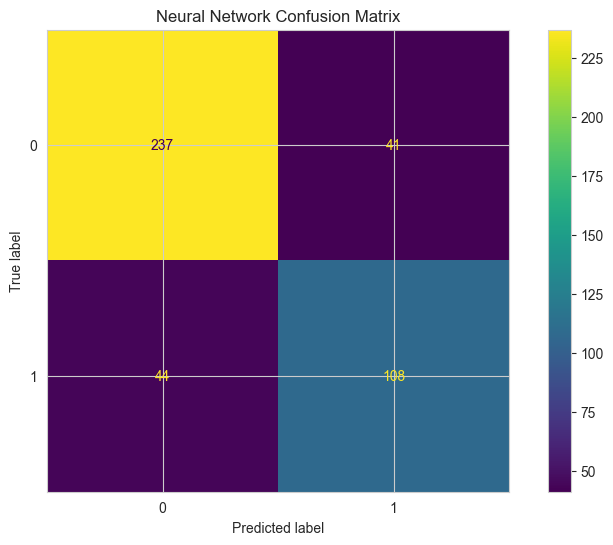

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

X = df.drop(['PatientID', 'DoctorInCharge', 'Diagnosis'], axis=1)
y = df['Diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

nn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', MLPClassifier(
        hidden_layer_sizes=(64,32), 
        activation='relu', 
        solver='adam',
        alpha=0.0001,
        batch_size=64,
        learning_rate_init=0.001,
        max_iter=500, 
        random_state=42
    ))
])

nn_pipeline.fit(X_train, y_train)

# Evaluate on training set
y_train_pred_nn = nn_pipeline.predict(X_train)
print('Training Performance:')
print(classification_report(y_train, y_train_pred_nn))

# Evaluate on test set
y_pred_nn = nn_pipeline.predict(X_test)
print('\nTest Performance:')
print(classification_report(y_test, y_pred_nn))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_nn)
plt.title('Neural Network Confusion Matrix')
plt.show()

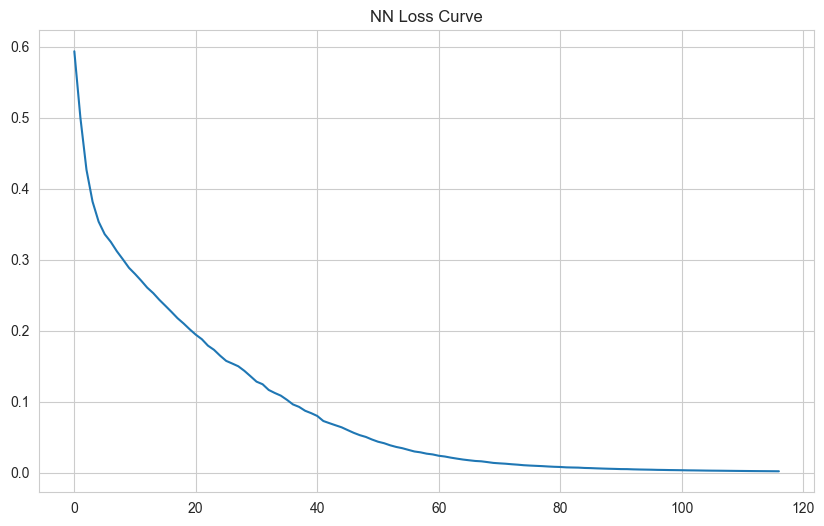

In [29]:
# Loss curve (as in original)
mlp_model = nn_pipeline.named_steps['classifier']
if hasattr(mlp_model, 'loss_curve_'):
    plt.plot(mlp_model.loss_curve_)
    plt.title('NN Loss Curve')
    plt.show()

## 3. Build a Primary Model (Two Classical ML Models)

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

lr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(random_state=42))
])
lr_pipeline.fit(X_train, y_train)

# Training performance
y_train_pred_lr = lr_pipeline.predict(X_train)
print('Logistic Regression - Training Performance:')
print(classification_report(y_train, y_train_pred_lr))

# Test performance
y_pred_lr = lr_pipeline.predict(X_test)
print('\nLogistic Regression - Test Performance:')
print(classification_report(y_test, y_pred_lr))

Logistic Regression - Training Performance:
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      1111
           1       0.82      0.75      0.78       608

    accuracy                           0.85      1719
   macro avg       0.84      0.83      0.83      1719
weighted avg       0.85      0.85      0.85      1719


Logistic Regression - Test Performance:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       278
           1       0.74      0.74      0.74       152

    accuracy                           0.82       430
   macro avg       0.80      0.80      0.80       430
weighted avg       0.82      0.82      0.82       430



In [31]:
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', RandomForestClassifier(random_state=42))
])
rf_pipeline.fit(X_train, y_train)

# Training performance
y_train_pred_rf = rf_pipeline.predict(X_train)
print('Random Forest - Training Performance:')
print(classification_report(y_train, y_train_pred_rf))

# Test performance
y_pred_rf = rf_pipeline.predict(X_test)
print('\nRandom Forest - Test Performance:')
print(classification_report(y_test, y_pred_rf))

# Conclusion: Random Forest performs better due to handling non-linearities.

Random Forest - Training Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1111
           1       1.00      1.00      1.00       608

    accuracy                           1.00      1719
   macro avg       1.00      1.00      1.00      1719
weighted avg       1.00      1.00      1.00      1719


Random Forest - Test Performance:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       278
           1       0.94      0.88      0.91       152

    accuracy                           0.94       430
   macro avg       0.94      0.92      0.93       430
weighted avg       0.94      0.94      0.94       430



## 4. Hyper-parameter Optimization with Cross-Validation 

In [32]:
from sklearn.model_selection import GridSearchCV

# For LR
param_grid_lr = {'clf__C': [0.01, 0.1, 1, 10, 100]}
grid_lr = GridSearchCV(lr_pipeline, param_grid_lr, cv=5, scoring='f1')
grid_lr.fit(X_train, y_train)
print('Best LR params:', grid_lr.best_params_)
print('Best CV score:', grid_lr.best_score_)

Best LR params: {'clf__C': 10}
Best CV score: 0.763316181391441


In [33]:
# For RF
param_grid_rf = {'clf__n_estimators': [50, 100, 200], 'clf__max_depth': [None, 10, 20]}
grid_rf = GridSearchCV(rf_pipeline, param_grid_rf, cv=5, scoring='f1')
grid_rf.fit(X_train, y_train)
print('Best RF params:', grid_rf.best_params_)
print('Best CV score:', grid_rf.best_score_)

Best RF params: {'clf__max_depth': 20, 'clf__n_estimators': 200}
Best CV score: 0.9074209314291137


## 5. Feature Selection 

Method: Embedded (feature_importances_ for RF), Wrapper (RFE for LR).
Justification: RF importances capture non-linear importance; RFE selects recursively for LR.

In [34]:
from sklearn.feature_selection import RFE

# For LR
rfe_lr = RFE(estimator=LogisticRegression(), n_features_to_select=15)
rfe_lr.fit(StandardScaler().fit_transform(X_train), y_train)
selected_lr = X.columns[rfe_lr.support_]
print('Selected for LR:', selected_lr)

Selected for LR: Index(['Age', 'EducationLevel', 'SleepQuality', 'CardiovascularDisease',
       'HeadInjury', 'Hypertension', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
       'MemoryComplaints', 'BehavioralProblems', 'ADL',
       'DifficultyCompletingTasks'],
      dtype='object')


Selected for RF: Index(['FunctionalAssessment', 'ADL', 'MMSE', 'MemoryComplaints',
       'BehavioralProblems', 'DietQuality', 'PhysicalActivity', 'SleepQuality',
       'CholesterolTriglycerides', 'CholesterolHDL', 'BMI', 'CholesterolTotal',
       'AlcoholConsumption', 'CholesterolLDL', 'DiastolicBP'],
      dtype='object')


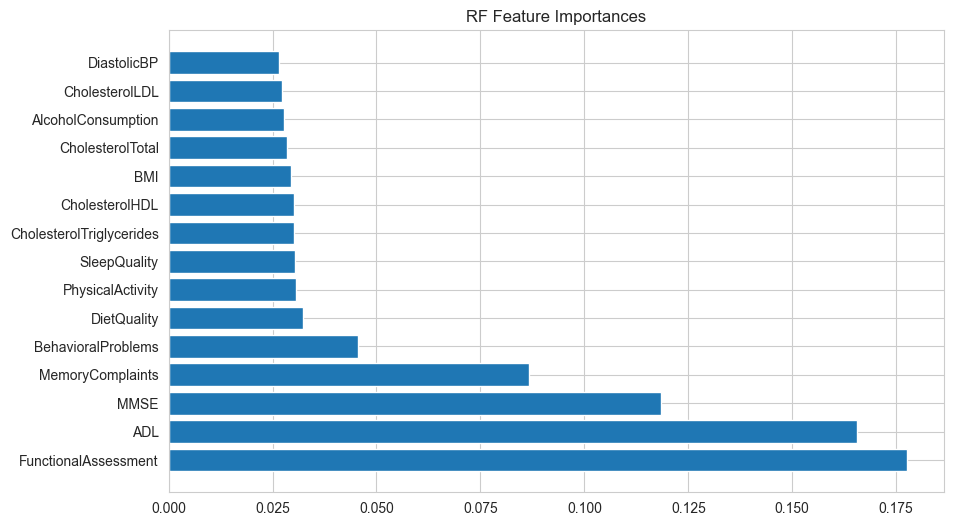

In [35]:
# For RF
rf_model = grid_rf.best_estimator_.named_steps['clf']
importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
selected_rf = importances.head(15).index
print('Selected for RF:', selected_rf)

plt.barh(selected_rf, importances.head(15))
plt.title('RF Feature Importances')
plt.show()

## 6. Final Models and Comparative Analysis


In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Final LR with selected features
X_train_lr = X_train[selected_lr]
X_test_lr = X_test[selected_lr]
final_lr = grid_lr.best_estimator_
final_lr.fit(X_train_lr, y_train)
y_pred_final_lr = final_lr.predict(X_test_lr)

# Final RF
X_train_rf = X_train[selected_rf]
X_test_rf = X_test[selected_rf]
final_rf = grid_rf.best_estimator_
final_rf.fit(X_train_rf, y_train)
y_pred_final_rf = final_rf.predict(X_test_rf)

# Final NN (use same selected as RF for simplicity)
X_train_nn = X_train[selected_rf]
X_test_nn = X_test[selected_rf]
final_nn = nn_pipeline
final_nn.fit(X_train_nn, y_train)
y_pred_final_nn = final_nn.predict(X_test_nn)

In [37]:
# Comparison Table
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'Neural Network'],
    'Features': [len(selected_lr), len(selected_rf), len(selected_rf)],
    'CV Score': [grid_lr.best_score_, grid_rf.best_score_, 'N/A'],  # NN no CV here
    'Accuracy': [accuracy_score(y_test, y_pred_final_lr), accuracy_score(y_test, y_pred_final_rf), accuracy_score(y_test, y_pred_final_nn)],
    'Precision': [precision_score(y_test, y_pred_final_lr), precision_score(y_test, y_pred_final_rf), precision_score(y_test, y_pred_final_nn)],
    'Recall': [recall_score(y_test, y_pred_final_lr), recall_score(y_test, y_pred_final_rf), recall_score(y_test, y_pred_final_nn)],
    'F1-Score': [f1_score(y_test, y_pred_final_lr), f1_score(y_test, y_pred_final_rf), f1_score(y_test, y_pred_final_nn)]
})
print(results)

                 Model  Features  CV Score  Accuracy  Precision    Recall  \
0  Logistic Regression        15  0.763316  0.823256   0.750000  0.750000   
1        Random Forest        15  0.907421  0.948837   0.945205  0.907895   
2       Neural Network        15       N/A  0.827907   0.774648  0.723684   

   F1-Score  
0  0.750000  
1  0.926174  
2  0.748299  


## 7. Conclusion

Conclusion: Random Forest with optimized params and selected features performs best. Future work: Address imbalance with SMOTE, test on real data.